# Tokenizers

In [ ]:
DRIVE_LINK = "/content/drive/MyDrive/LLMFromScratch"

## Word based tokenizer

In [ ]:
import re

In [ ]:
with open(f"{DRIVE_LINK}/verdict.txt", "r") as f:
  data = f.read()

In [ ]:
data

'I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)\n\n"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it\'s going to send the value of my picture \'way up; but I don\'t think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing\'s lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn\'s "Moon-dancers" to say, with tears in her eyes: "We shall not look upon its like again"?\n\nWell!--even 

In [ ]:
processed_data = re.split(r'([.,"!?]|--|\s)', data)
# Now we wanted to remove the space
processed_data = [d for d in processed_data if d.strip()]
processed_data[:10]

['I',
 'HAD',
 'always',
 'thought',
 'Jack',
 'Gisburn',
 'rather',
 'a',
 'cheap',
 'genius']

In [ ]:
# Assign token ids by sorting the list first and then assigning enum values
vocab_set = sorted(set(processed_data))
vocab_dict_encoded = {vocab_string: number for number, vocab_string in enumerate(vocab_set)}
vocab_dict_decoded = {v: k for k, v in vocab_dict_encoded.items()}

In [ ]:
# Now lets create a class with method encode and decode

In [ ]:
class WordTokenizer:

  def __init__(self, vocab):
    self.vocab = vocab
    self.vocab_encoded = {vocab_string: number for number, vocab_string in enumerate(self.vocab)}
    self.vocab_decoded = {v: k for k, v in self.vocab_encoded.items()}

  def encode(self, text):
    processed_data = re.split(r'([.,"!?]|--|\s)', text)
    # Now we wanted to remove the space
    processed_data = [d for d in processed_data if d.strip()]
    # Convert to tokens and return the list
    token_ids = [self.vocab_encoded[processed] for processed in processed_data]
    return token_ids

  def decode(self, tokens):
    token_to_str = [self.vocab_decoded[token] for token in tokens]
    decoded_string = " ".join(token_to_str)
    return decoded_string

In [ ]:
data[:33]

'I HAD always thought Jack Gisburn'

In [ ]:
tokenizer = WordTokenizer(vocab_set)
text = "I HAD always thought Jack Gisburn"

token_list = tokenizer.encode(text)
token_list

[66, 56, 187, 1059, 74, 47]

In [ ]:
tokenizer.decode(token_list) # So the basic tokenizer is working fine

'I HAD always thought Jack Gisburn'

In [ ]:
# it cannot handle unknowns
text = "Hello I am happy"
token_list = tokenizer.encode(text)
token_list

KeyError: 'Hello'

In [ ]:
# New vocab set where unknowns and end of texts are handled
vocab_set.extend(['<UNK>','<|endoftext|>'])

In [ ]:
class WordTokenizerV2:

  def __init__(self, vocab):
    self.vocab = vocab
    self.vocab_encoded = {vocab_string: number for number, vocab_string in enumerate(self.vocab)}
    self.vocab_decoded = {v: k for k, v in self.vocab_encoded.items()}

  def encode(self, text):
    processed_data = re.split(r'([.,"!?]|--|\s)', text)
    # Now we wanted to remove the space
    processed_data = [d for d in processed_data if d.strip()]
    processed_data.append('<|endoftext|>')
    # Convert to tokens and return the list
    token_ids = [self.vocab_encoded[processed] if processed in self.vocab
                 else self.vocab_encoded['<UNK>']
                 for processed in processed_data
                 ]
    return token_ids

  def decode(self, tokens):
    token_to_str = [self.vocab_decoded[token] for token in tokens]
    decoded_string = " ".join(token_to_str)
    return decoded_string

In [ ]:
tokenizer = WordTokenizerV2(vocab_set)
text = "I HAD always thought Jack Gisburn"

token_list = tokenizer.encode(text)
token_list

[66, 56, 187, 1059, 74, 47, 1194]

In [ ]:
tokenizer.decode(token_list) # So the basic tokenizer is working fine

'I HAD always thought Jack Gisburn <|endoftext|>'

In [ ]:
# it cannot handle unknowns
text = "Hello I am happy"
token_list = tokenizer.encode(text)
token_list

[1193, 66, 1193, 1193, 1194]

In [ ]:
tokenizer.decode(token_list) # So the basic tokenizer is working fine

'<UNK> I <UNK> <UNK> <|endoftext|>'

## BPE (Sub word tokenization)
Even though word or character can be useful in somecases, it cannot differentiate unknown words. For instance "boy" and "boys" will be treated as separate vocab. Thats why we need to use BPE which is used by GPT itself

In [ ]:
!pip install tiktoken

In [ ]:
import tiktoken

In [ ]:
tokenizer = tiktoken.get_encoding("gpt2") # we dont have to use our own vocab set. We will GPT2's

text = "I HAD always thought Jack Gisburn"

token_list = tokenizer.encode(text)
token_list

[40, 367, 2885, 1464, 1807, 3619, 402, 271, 10899]

In [ ]:
tokenizer.decode(token_list) # So the basic tokenizer is working fine

'I HAD always thought Jack Gisburn'

In [ ]:
text = "Hello I am happy"
token_list = tokenizer.encode(text)
token_list

[15496, 314, 716, 3772]

In [ ]:
tokenizer.decode(token_list) # So the basic tokenizer is working fine

'Hello I am happy'

In [ ]:
text = "Aidhsadisafgsafsa fsfs <|endoftext|>"
token_list = tokenizer.encode(text,allowed_special={"<|endoftext|>"})
token_list

[44245, 11994, 324, 271, 1878, 14542, 1878, 11400, 43458, 9501, 220, 50256]

In [ ]:
tokenizer.decode(token_list) # So the basic tokenizer is working fine even with gibberish texts, it can do BPE

'Aidhsadisafgsafsa fsfs <|endoftext|>'

# Preparing a data loader pair
Input and target pair is created with the given context window
The LLM predict context number times

In [ ]:
with open(f"{DRIVE_LINK}/verdict.txt", "r") as f:
  data = f.read()

In [ ]:
tokenized_id = tokenizer.encode(data,allowed_special={"<|endoftext|>"})
max_len = 4
stride = 4
input_pair_list = []
target_pair_list = []
for i in range(0, (len(tokenized_id) - max_len), stride):
  input_pair = tokenized_id[i:i+max_len]
  target_ids = tokenized_id[i+1:(i+max_len+1)]
  input_pair_list.append(input_pair)
  target_pair_list.append(target_ids)



In [ ]:
input_pair_list[:4], target_pair_list[:4]

([[40, 367, 2885, 1464],
  [1807, 3619, 402, 271],
  [10899, 2138, 257, 7026],
  [15632, 438, 2016, 257]],
 [[367, 2885, 1464, 1807],
  [3619, 402, 271, 10899],
  [2138, 257, 7026, 15632],
  [438, 2016, 257, 922]])

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

# Dataset is used to create a dataset with input and target pairs
# whereas data loaders prepares batches of data
# pair should be [1,2,3,4,5] where input is [1,2,3,4],[5,...] and target id is[2,3,4,5] if the context length is 4

class GPTData(Dataset):

  def __init__(self, text, max_len, tokenizer, strides):
    self.input_pairs = []
    self.target_ids = []

    tokenized_id = tokenizer.encode(text,allowed_special={"<|endoftext|>"})

    for i in range(0, (len(tokenized_id) - max_len), stride):
      input_pair = tokenized_id[i:i+max_len]
      target_id = tokenized_id[i+1:(i+max_len+1)]
      self.input_pairs.append(torch.tensor(input_pair))
      self.target_ids.append(torch.tensor(target_id))

  # from pytorch documentation
  # A custom Dataset class must implement three functions: __init__, __len__, and __getitem__
  def __len__(self):
    return len(self.input_pairs)

  def __getitem__(self, idx):
    return self.input_pairs[idx], self.target_ids[idx]


In [ ]:
def create_dataloaders(text, tokenizer, max_len=4, strides=4, shuffle = False):
  dataset = GPTData(text, max_len, tokenizer, strides)

  dataloader = DataLoader(
      dataset,
      batch_size = 8,
      shuffle = shuffle,
      num_workers=0,
      drop_last = True # to remove the last batch if it doesnt fit
  )
  return dataloader

In [ ]:
sample_dataloader = create_dataloaders(data, tokenizer)

In [ ]:
data_iter = iter(sample_dataloader)

inputs, targets = next(data_iter)

# Print them
print("Inputs:\n", inputs)
print("Targets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


In [ ]:
# In GPT bigset of context length and strides are used 256 and 128 strides and we are also going to shuffle
dataloader_gpt = create_dataloaders(data, tokenizer, 256, 128, True)

In [ ]:
data_iter = iter(dataloader_gpt)

inputs, targets = next(data_iter)

# Print them
print("Inputs:\n", inputs)
print("Targets:\n", targets)

Inputs:
 tensor([[26394,    12,   301,  ...,   340,  2652,   526],
        [   25,   705,  8491,  ...,   508,  2067, 41379],
        [    1,  1639,  1683,  ...,  9885,   345,   286],
        [  330,    11,  4844,  ..., 16896,    13,   198]])
Targets:
 tensor([[   12,   301,   971,  ...,  2652,   526,   198],
        [  705,  8491,   345,  ...,  2067, 41379,   293],
        [ 1639,  1683,  2993,  ...,   345,   286,  2376],
        [   11,  4844,   286,  ...,    13,   198,   198]])


# Embedding Layer

In [ ]:
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [ ]:
inputs, inputs.shape # we have a batch of 8 and there are 4 context length.
# when we go to the lookup table (which is the embedding layer) , it will take the associated embeddings for each token
# shape will be 8 * 4 * 256

(tensor([[   40,   367,  2885,  1464],
         [ 1807,  3619,   402,   271],
         [10899,  2138,   257,  7026],
         [15632,   438,  2016,   257],
         [  922,  5891,  1576,   438],
         [  568,   340,   373,   645],
         [ 1049,  5975,   284,   502],
         [  284,  3285,   326,    11]]),
 torch.Size([8, 4]))

In [ ]:
token_embeddings = token_embedding_layer(inputs)

In [ ]:
token_embeddings, token_embeddings.shape

(tensor([[[ 0.9659, -0.7010,  0.7143,  ..., -0.2636,  0.2618, -0.8756],
          [-1.1383, -0.6771,  0.6871,  ...,  2.6699, -0.1854,  0.1297],
          [ 0.1004, -0.8960,  1.3923,  ..., -0.0654,  0.4485,  1.4901],
          [-1.2791, -0.1519,  0.1748,  ...,  0.4982,  0.9488, -2.1363]],
 
         [[-1.3207, -0.3346,  0.9454,  ..., -0.3240,  1.8723,  0.4384],
          [-1.2886,  0.5049,  0.4318,  ..., -1.2039, -0.0404, -1.0580],
          [-2.2023, -1.2074, -1.9373,  ...,  0.1502,  0.7010, -1.1119],
          [-0.2954, -0.4827,  0.2344,  ...,  1.1787, -0.5044, -0.3096]],
 
         [[-0.9376, -0.1774, -2.5003,  ...,  1.6405, -0.7558, -0.2952],
          [-1.8430,  0.3082, -0.5095,  ...,  0.4742, -2.0521,  1.2409],
          [-0.4028,  2.1935, -0.8744,  ...,  2.0607,  1.0424,  0.7818],
          [ 1.0648, -0.6196, -0.6809,  ...,  2.3825, -0.4614,  1.3214]],
 
         ...,
 
         [[ 0.9817,  1.5180,  2.2416,  ..., -0.0861,  0.9667,  0.2564],
          [ 1.0732, -0.5670,  0.0319,  

In [ ]:
position_embeddings_layer = torch.nn.Embedding(max_len, output_dim) # since positions are only 4 tokens at a time, we create embeddings for each position
# 4*256 will be the final output size from this layer

In [ ]:
# then to create a positional matrices ,  pass on values from 0 to max_len-1
position_embeddings = position_embeddings_layer(torch.arange(0, max_len))
position_embeddings.shape, position_embeddings

(torch.Size([4, 256]),
 tensor([[-0.2591,  0.5590, -0.7034,  ...,  1.2302,  0.7379,  1.0161],
         [-0.0087,  0.4755, -0.7032,  ..., -0.1552, -0.3727, -0.2881],
         [ 0.4005, -0.2294, -2.0884,  ..., -0.5913, -1.0377,  2.7518],
         [ 0.3720, -0.2978,  1.2698,  ...,  1.1890, -0.6992,  0.4723]],
        grad_fn=<EmbeddingBackward0>))

In [ ]:
torch.arange(0,4)

tensor([0, 1, 2, 3])

In [ ]:
token_embeddings

torch.Size([8, 4, 256])

In [ ]:
# now add up positonal embeddings and token embeddings
input_embeddings = token_embeddings + position_embeddings
input_embeddings.shape

torch.Size([8, 4, 256])

In [ ]:
0.9659-0.2591

0.7068

In [ ]:
input_embeddings[0]

tensor([[ 0.7068, -0.1420,  0.0109,  ...,  0.9666,  0.9997,  0.1405],
        [-1.1469, -0.2016, -0.0161,  ...,  2.5147, -0.5581, -0.1584],
        [ 0.5010, -1.1255, -0.6961,  ..., -0.6567, -0.5891,  4.2420],
        [-0.9071, -0.4497,  1.4445,  ...,  1.6873,  0.2497, -1.6639]],
       grad_fn=<SelectBackward0>)

# Attention layer

## check

In [ ]:
import torch
embeddings = [[0.43, 0.15, 0.89], #your
              [0.55, 0.87, 0.66], #journey
              [0.57, 0.85, 0.64], #starts
              [0.22, 0.58, 0.33], #with
              [0.77, 0.25, 0.10], #one
              [0.05, 0.80, 0.55]] #step

w_q = [[0.2961, 0.5166],
       [0.2517, 0.6886],
       [0.0740, 0.8665]]

w_k = [[0.1366, 0.1025],
       [0.1841, 0.7264],
       [0.3153, 0.6871]]

w_v = [[0.0756, 0.1966],
       [0.3164, 0.4017],
       [0.1186, 0.8274]]

q = torch.tensor(embeddings) @ torch.tensor(w_q)
k = torch.tensor(embeddings) @ torch.tensor(w_k)
v = torch.tensor(embeddings) @ torch.tensor(w_v)

print(q,k,v)

tensor([[0.2309, 1.0966],
        [0.4307, 1.4551],
        [0.4301, 1.4343],
        [0.2355, 0.7990],
        [0.2983, 0.6566],
        [0.2569, 1.0533]]) tensor([[0.3670, 0.7646],
        [0.4434, 1.1418],
        [0.4361, 1.1156],
        [0.2409, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]]) tensor([[0.1855, 0.8812],
        [0.3951, 1.0037],
        [0.3879, 0.9830],
        [0.2393, 0.5493],
        [0.1492, 0.3345],
        [0.3221, 0.7863]])


In [ ]:
torch.dot(torch.tensor([0.4307, 1.4551]), torch.tensor([0.3275, 0.9642]))

tensor(1.5441)

In [ ]:
torch.tensor([1.2706, 1.8524, 1.8111, 1.0795, 0.5577, 1.5441])/(k.shape[1]**(0.5))

tensor([0.8984, 1.3098, 1.2806, 0.7633, 0.3944, 1.0918])

In [ ]:
torch.softmax(torch.tensor([0.8984, 1.3098, 1.2806, 0.7633, 0.3944, 1.0918]), dim=0)

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])

In [ ]:
torch.softmax(torch.tensor([0.8984, 1.3098, -torch.inf, -torch.inf, -torch.inf, -torch.inf]), dim=0)

tensor([0.3986, 0.6014, 0.0000, 0.0000, 0.0000, 0.0000])

In [ ]:
torch.inf

inf

In [ ]:
0.1820 * torch.tensor([0.3221, 0.7863])

tensor([0.0586, 0.1431])

In [ ]:
0.1323+0.2272+0.2162+0.0720+0.303+0.1431

1.0938

## Simplified attention without weights

In [ ]:
import torch

In [ ]:
#let us assume the embedding for the sentence "Your Journey starts with one step"

embeddings = [[0.43, 0.15, 0.89], #your
              [0.55, 0.87, 0.66], #journey
              [0.57, 0.85, 0.64], #starts
              [0.22, 0.58, 0.33], #with
              [0.77, 0.25, 0.10], #one
              [0.05, 0.80, 0.55]] #step

In [ ]:
# In order to find the important with respect to the other word, we "project" it (which means dot product)
# consider the word "journey"
# The below term is called Attention score
torch.dot(torch.tensor(embeddings[1]), torch.tensor(embeddings[0])) # this is the importance of "Your" with respect to "journey"

tensor(0.9544)

In [ ]:
# Lets do the same for all words with "journey"
# For journey, we want the list to have 6 attention scores (since number of words in te sentence is 6)
attention_scores = []
for i in range(len(embeddings)):
  attention = torch.dot(torch.tensor(embeddings[1]), torch.tensor(embeddings[i]))  # journey with respect to other words
  attention_scores.append(attention)
print(attention_scores)

[tensor(0.9544), tensor(1.4950), tensor(1.4754), tensor(0.8434), tensor(0.7070), tensor(1.0865)]


In [ ]:
# now we wanted to normalize the attention score - which gives attention weights
# we do softmax

attention_weights = torch.softmax(torch.tensor(attention_scores), dim=0)
attention_weights
# "Your" is 13.85% important with respect to "Journey"
# "Journey" is 23.79% important with itself
# "starts" is 23.33% important with respect to "Journey"
# "with" is 12.40% important with respect to "Journey"
# "one" is 10.82% important with respect to "Journey"
# "step" is 15.81% important with respect to "Journey"

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

In [ ]:
# To calculate the context vector, we use the attention weight as scaling factor for each embeddings
# once we have all the scaling vector we sum them across dimension to get the final context vector
context_vector = []
for i in range(len(embeddings)):
  context_vector.append(attention_weights[i] * torch.tensor(embeddings[i]))

In [ ]:
context_vector

[tensor([0.0596, 0.0208, 0.1233]),
 tensor([0.1308, 0.2070, 0.1570]),
 tensor([0.1330, 0.1983, 0.1493]),
 tensor([0.0273, 0.0719, 0.0409]),
 tensor([0.0833, 0.0270, 0.0108]),
 tensor([0.0079, 0.1265, 0.0870])]

In [ ]:
final_context_vector = torch.sum(torch.stack(context_vector), dim=0)
final_context_vector # This is the journey context vector with respect to other words

tensor([0.4419, 0.6515, 0.5683])

In [ ]:
#can we do something efficiently ultimately we want 6*3 dimensions
# attention scores for all can be matrix multiplication

attention_score_all = torch.tensor(embeddings) @ torch.tensor(embeddings).T
attention_score_all
# verify if my second row "journey" is same as below
# [tensor(0.9544), tensor(1.4950), tensor(1.4754), tensor(0.8434), tensor(0.7070), tensor(1.0865)]

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

In [ ]:
# attention weight of "journey" tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
attention_weights_all = torch.softmax(attention_score_all, dim=1)
attention_weights_all

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

In [ ]:
# context vector # 6*3
# tensor([0.4419, 0.6515, 0.5683])
context_vector_all = attention_weights_all @ torch.tensor(embeddings)
context_vector_all

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])

# Self Attention with trainable weight params


## Why we are dividing by sqrt of dimension vector QK(transpose)/sqrt(d) for attention score to attention weight transformation

In [ ]:
import numpy as np
import seaborn as sns
import torch
def get_dims(dims):
  normal = []
  scaled = []
  normal_softmax = []
  scaled_softmax = []
  for i in range(1000):
    q = np.random.randn(dims)
    k = np.random.randn(dims)

    dot_product = np.dot(q,k)
    dot_product_scaled = dot_product / np.sqrt(dims)
    normal.append(dot_product)
    scaled.append(dot_product_scaled)

  print(f"Variance for normal and scaled values are {np.var(normal)}, {np.var(scaled)}")

for dims in [10,50,100, 200, 250, 300]:
  print(f"for dimensions {dims}")
  get_dims(dims)

for dimensions 10
Variance for normal and scaled values are 9.907351575597529, 0.9907351575597528
for dimensions 50
Variance for normal and scaled values are 46.564144291686254, 0.931282885833725
for dimensions 100
Variance for normal and scaled values are 102.11974090553699, 1.0211974090553697
for dimensions 200
Variance for normal and scaled values are 200.72127173869225, 1.0036063586934612
for dimensions 250
Variance for normal and scaled values are 251.73183325690047, 1.006927333027602
for dimensions 300
Variance for normal and scaled values are 307.9697229548999, 1.0265657431829993



--- For dimension = 10 ---
Variance for normal and scaled values (before softmax) are 10.119712801586633, 1.0119712801586633

--- For dimension = 50 ---
Variance for normal and scaled values (before softmax) are 51.52900470959969, 1.0305800941919938

--- For dimension = 100 ---
Variance for normal and scaled values (before softmax) are 98.57008036093026, 0.9857008036093028


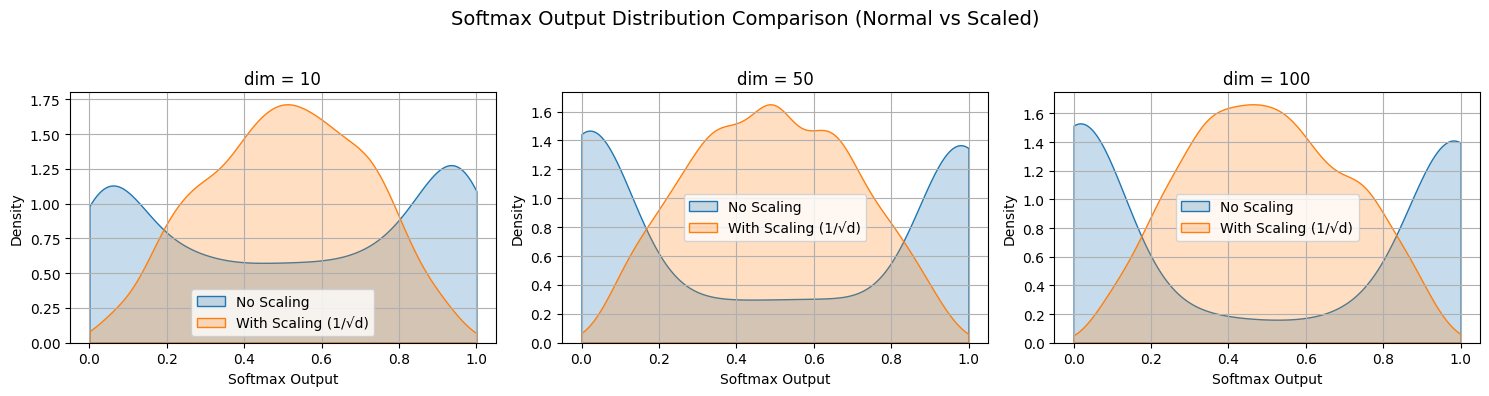

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch

def get_softmax(x):
    x_tensor = torch.tensor(x, dtype=torch.float32)
    return torch.nn.functional.softmax(x_tensor, dim=0).numpy()

def get_dims(dims, ax):
    normal_softmax_values = []
    scaled_softmax_values = []
    normal = []
    scaled = []
    for _ in range(1000):
        q = np.random.randn(dims)
        k = np.random.randn(dims)

        dot = np.dot(q, k)
        dot_scaled = dot / np.sqrt(dims)
        normal.append(dot)
        scaled.append(dot_scaled)
        normal_softmax = get_softmax([dot, 0])
        scaled_softmax = get_softmax([dot_scaled, 0])

        normal_softmax_values.append(normal_softmax[0])
        scaled_softmax_values.append(scaled_softmax[0])

    # Print variance
    print(f"Variance for normal and scaled values (before softmax) are {np.var(normal)}, {np.var(scaled)}")

    # Plot into subplot axis
    sns.kdeplot(normal_softmax_values, label='No Scaling', fill=True, ax=ax, clip=(0, 1))
    sns.kdeplot(scaled_softmax_values, label='With Scaling (1/√d)', fill=True, ax=ax, clip=(0, 1))
    ax.set_title(f"dim = {dims}")
    ax.set_xlabel("Softmax Output")
    ax.set_ylabel("Density")
    ax.grid(True)
    ax.legend()
    return normal_softmax_values, scaled_softmax_values
# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, dims in enumerate([10, 50, 100]):
    print(f"\n--- For dimension = {dims} ---")
    result = get_dims(dims, axes[i])

plt.suptitle("Softmax Output Distribution Comparison (Normal vs Scaled)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()


## Self Attention scratchpad implementation

In [3]:
import torch

#let us assume the embedding for the sentence "Your Journey starts with one step"

embeddings = [[0.43, 0.15, 0.89], #your
              [0.55, 0.87, 0.66], #journey
              [0.57, 0.85, 0.64], #starts
              [0.22, 0.58, 0.33], #with
              [0.77, 0.25, 0.10], #one
              [0.05, 0.80, 0.55]] #step

In [ ]:
# First lets have our own weights to cross verify the results.

w_q = [[0.2961,0.5166],
       [0.2517,0.6886],
       [0.0740,0.8665]]
w_k = [[0.1366,0.1025],
       [0.1841,0.7264],
       [0.3153,0.6871]]
w_v = [[0.0756,0.1966],
       [0.3164,0.4017],
       [0.1186,0.8274]]
print(f"Dimension of my weight vectors: {torch.tensor(w_q).shape}")

q = torch.tensor(embeddings) @ torch.tensor(w_q)
k = torch.tensor(embeddings) @ torch.tensor(w_k)
v = torch.tensor(embeddings) @ torch.tensor(w_v)

print(f"Query, Key and value matrices are \n {q},\n {k},\n {v}\n")

# Attention matrix calculation
attention_matrix = q @ k.T
print(f"Attention matrix is {attention_matrix}\n")
print(f'Interim value before attention weight calculation {attention_matrix / (v.shape[1]**0.5)}')
attention_weights = torch.softmax(attention_matrix / (v.shape[1]**0.5), dim=1)
print(f"Attention weight matrix is {attention_weights}\n")

# Then we scale the value vector using the attention weights
context_vector = attention_weights @ v
print(f"Final context vector is {context_vector}")

Dimension of my weight vectors: torch.Size([3, 2])
Query, Key and value matrices are 
 tensor([[0.2309, 1.0966],
        [0.4307, 1.4551],
        [0.4301, 1.4343],
        [0.2355, 0.7990],
        [0.2983, 0.6566],
        [0.2569, 1.0533]]),
 tensor([[0.3670, 0.7646],
        [0.4434, 1.1418],
        [0.4361, 1.1156],
        [0.2409, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]]),
 tensor([[0.1855, 0.8812],
        [0.3951, 1.0037],
        [0.3879, 0.9830],
        [0.2393, 0.5493],
        [0.1492, 0.3345],
        [0.3221, 0.7863]])

Attention matrix is tensor([[0.9232, 1.3545, 1.3241, 0.7910, 0.4032, 1.1329],
        [1.2705, 1.8524, 1.8112, 1.0795, 0.5578, 1.5440],
        [1.2545, 1.8285, 1.7877, 1.0655, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6115, 0.8820, 0.8626, 0.5122, 0.2707, 0.7308],
        [0.8996, 1.3166, 1.2871, 0.7682, 0.3937, 1.0997]])

Interim value before attention weight calculation tensor([[0.6528, 

## Causal Attention scratchpad implementation

In [ ]:
import numpy as np

In [ ]:
attention_matrix

tensor([[0.9232, 1.3545, 1.3241, 0.7910, 0.4032, 1.1329],
        [1.2705, 1.8524, 1.8112, 1.0795, 0.5578, 1.5440],
        [1.2545, 1.8285, 1.7877, 1.0655, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6115, 0.8820, 0.8626, 0.5122, 0.2707, 0.7308],
        [0.8996, 1.3166, 1.2871, 0.7682, 0.3937, 1.0997]])

In [ ]:
attention_matrix_causal = torch.masked_fill(attention_matrix, torch.triu(torch.ones(6,6), diagonal=1).bool(), value=-np.inf)
attention_matrix_causal

tensor([[0.9232,   -inf,   -inf,   -inf,   -inf,   -inf],
        [1.2705, 1.8524,   -inf,   -inf,   -inf,   -inf],
        [1.2545, 1.8285, 1.7877,   -inf,   -inf,   -inf],
        [0.6973, 1.0167, 0.9941, 0.5925,   -inf,   -inf],
        [0.6115, 0.8820, 0.8626, 0.5122, 0.2707,   -inf],
        [0.8996, 1.3166, 1.2871, 0.7682, 0.3937, 1.0997]])

In [ ]:
attention_weights_causal = torch.softmax(attention_matrix_causal / (v.shape[1]**0.5), dim=1)
attention_weights_causal

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3986, 0.6014, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2526, 0.3791, 0.3683, 0.0000, 0.0000, 0.0000],
        [0.2265, 0.2839, 0.2794, 0.2103, 0.0000, 0.0000],
        [0.1952, 0.2363, 0.2331, 0.1820, 0.1534, 0.0000],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])

In [ ]:
dropout = torch.nn.Dropout(0.5)

attention_weights_causal = dropout(attention_weights_causal)

In [ ]:
context_vector_causal = attention_weights_causal @ v
print(f"Final context vector is {context_vector}")

Final context vector is tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7938],
        [0.2927, 0.7890],
        [0.2990, 0.8040]])


## Self and Causal Attention Class

Works on batches too

In [ ]:
import numpy as np
import torch

In [4]:
embeddings_batch = torch.stack((torch.tensor(embeddings),torch.tensor(embeddings)))

In [ ]:
k.transpose(0,1).shape

torch.Size([2, 6])

In [ ]:
w_q = torch.nn.Linear(3, 2, bias=False)
q_sample = w_q(embeddings_batch)
q_sample

(tensor([[[ 0.6067, -0.3198],
          [ 0.9204, -0.1370],
          [ 0.9126, -0.1222],
          [ 0.5040, -0.0773],
          [ 0.5153,  0.1782],
          [ 0.6129, -0.2257]],
 
         [[ 0.6067, -0.3198],
          [ 0.9204, -0.1370],
          [ 0.9126, -0.1222],
          [ 0.5040, -0.0773],
          [ 0.5153,  0.1782],
          [ 0.6129, -0.2257]]], grad_fn=<UnsafeViewBackward0>),
 torch.Size([2, 6, 2]))

In [ ]:
q_sample.transpose(2,1)

tensor([[[ 0.6067,  0.9204,  0.9126,  0.5040,  0.5153,  0.6129],
         [-0.3198, -0.1370, -0.1222, -0.0773,  0.1782, -0.2257]],

        [[ 0.6067,  0.9204,  0.9126,  0.5040,  0.5153,  0.6129],
         [-0.3198, -0.1370, -0.1222, -0.0773,  0.1782, -0.2257]]],
       grad_fn=<TransposeBackward0>)

In [ ]:
q_sample.T, q_sample.T.shape

(tensor([[[0.4269, 0.4269],
          [0.3241, 0.3241],
          [0.3244, 0.3244],
          [0.1346, 0.1346],
          [0.2398, 0.2398],
          [0.1452, 0.1452]],
 
         [[0.5184, 0.5184],
          [0.3808, 0.3808],
          [0.3807, 0.3807],
          [0.1569, 0.1569],
          [0.2723, 0.2723],
          [0.1744, 0.1744]]], grad_fn=<PermuteBackward0>),
 torch.Size([2, 6, 2]))

In [ ]:
class SelfAttention(torch.nn.Module):

  def __init__(self, dim_in, dim_out, qkv_bias):
    super().__init__()

    self.w_q = torch.nn.Linear(dim_in, dim_out, bias=qkv_bias)
    self.w_k = torch.nn.Linear(dim_in, dim_out, bias=qkv_bias)
    self.w_v = torch.nn.Linear(dim_in, dim_out, bias=qkv_bias)

  def forward(self, x):

    batch, dim_in, dim_out = x.shape

    q = self.w_q(x)
    k = self.w_k(x)
    v = self.w_v(x)

    attention_matrix = q @ k.transpose(2,1) # swaps second dimension with 1st dimension (2,6,2) to (2,2,6)
    attention_weights = torch.softmax(attention_matrix / (v.shape[1]**0.5), dim=1)
    context_vector = attention_weights @ v
    return context_vector


In [ ]:
self_attention_obj = SelfAttention(dim_in = torch.tensor(embeddings_batch).shape[2], dim_out = 2, qkv_bias = False)
context_vector_self_attention = self_attention_obj(torch.tensor(embeddings_batch))
print(context_vector_self_attention)

tensor([[[0.2791, 0.4021],
         [0.2818, 0.4020],
         [0.2817, 0.4018],
         [0.2822, 0.4024],
         [0.2802, 0.3992],
         [0.2830, 0.4038]],

        [[0.2791, 0.4021],
         [0.2818, 0.4020],
         [0.2817, 0.4018],
         [0.2822, 0.4024],
         [0.2802, 0.3992],
         [0.2830, 0.4038]]], grad_fn=<UnsafeViewBackward0>)


/tmp/ipython-input-51-3595751820.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self_attention_obj = SelfAttention(dim_in = torch.tensor(embeddings_batch).shape[2], dim_out = 2, qkv_bias = False)
/tmp/ipython-input-51-3595751820.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  context_vector_self_attention = self_attention_obj(torch.tensor(embeddings_batch))


In [ ]:
class CausalAttention(torch.nn.Module):

  def __init__(self, dim_in, dim_out, qkv_bias, dropout_percentage):
    super().__init__()

    self.w_q = torch.nn.Linear(dim_in, dim_out, bias=qkv_bias)
    self.w_k = torch.nn.Linear(dim_in, dim_out, bias=qkv_bias)
    self.w_v = torch.nn.Linear(dim_in, dim_out, bias=qkv_bias)
    self.dropout = torch.nn.Dropout(dropout_percentage)

  def forward(self, x):
    q = self.w_q(x)
    k = self.w_k(x)
    v = self.w_v(x)

    attention_matrix = q @ k.transpose(2,1) # swaps second dimension with 1st dimension (2,6,2) to (2,2,6)
    attention_matrix.masked_fill_(torch.triu(torch.ones(6,6), diagonal=1).bool(), value=-np.inf)
    attention_weights = torch.softmax(attention_matrix / (v.shape[1]**0.5), dim=1)
    context_vector = attention_weights @ v
    return context_vector

causal_attention_obj = CausalAttention(dim_in = embeddings_batch.shape[2], dim_out = 2, qkv_bias = False, dropout_percentage=0.5)
context_vector_causal_attention = causal_attention_obj(torch.tensor(embeddings_batch))
print(context_vector_causal_attention)

tensor([[[-0.0302, -0.0658],
         [ 0.0120, -0.1554],
         [ 0.0654, -0.2699],
         [ 0.1141, -0.3761],
         [ 0.3111, -0.5316],
         [ 0.3147, -0.8097]],

        [[-0.0302, -0.0658],
         [ 0.0120, -0.1554],
         [ 0.0654, -0.2699],
         [ 0.1141, -0.3761],
         [ 0.3111, -0.5316],
         [ 0.3147, -0.8097]]], grad_fn=<UnsafeViewBackward0>)


/tmp/ipython-input-52-339935072.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  context_vector_causal_attention = causal_attention_obj(torch.tensor(embeddings_batch))


## Extending the same to Multi head attention

In [ ]:
class MultiheadAttention(torch.nn.Module):

  def __init__(self, dim_in, dim_out, qkv_bias, num_heads):
    super().__init__()

    self.heads = torch.nn.ModuleList([SelfAttention(dim_in, dim_out, qkv_bias) for _ in range(num_heads)])

  def forward(self, x):

    return torch.cat([head(x) for head in self.heads], dim=-1)



In [ ]:
ma = MultiheadAttention(dim_in = embeddings_batch.shape[2], dim_out = 2, qkv_bias = False, num_heads=2)
cv_ma = ma(embeddings_batch)
cv_ma

tensor([[[-0.3744, -0.2701,  0.1107, -0.1882],
         [-0.3903, -0.2793,  0.1118, -0.1904],
         [-0.3895, -0.2791,  0.1118, -0.1904],
         [-0.4011, -0.2874,  0.1082, -0.1882],
         [-0.3790, -0.2770,  0.1095, -0.1903],
         [-0.4083, -0.2897,  0.1086, -0.1877]],

        [[-0.3744, -0.2701,  0.1107, -0.1882],
         [-0.3903, -0.2793,  0.1118, -0.1904],
         [-0.3895, -0.2791,  0.1118, -0.1904],
         [-0.4011, -0.2874,  0.1082, -0.1882],
         [-0.3790, -0.2770,  0.1095, -0.1903],
         [-0.4083, -0.2897,  0.1086, -0.1877]]], grad_fn=<CatBackward0>)

## Multi head attention mechanism (efficient)

### Multi head scratchpad

In [1]:
import torch
import numpy as np

In [6]:
embeddings_batch, embeddings_batch.shape

(tensor([[[0.4300, 0.1500, 0.8900],
          [0.5500, 0.8700, 0.6600],
          [0.5700, 0.8500, 0.6400],
          [0.2200, 0.5800, 0.3300],
          [0.7700, 0.2500, 0.1000],
          [0.0500, 0.8000, 0.5500]],
 
         [[0.4300, 0.1500, 0.8900],
          [0.5500, 0.8700, 0.6600],
          [0.5700, 0.8500, 0.6400],
          [0.2200, 0.5800, 0.3300],
          [0.7700, 0.2500, 0.1000],
          [0.0500, 0.8000, 0.5500]]]),
 torch.Size([2, 6, 3]))

In [32]:
dim_in, new_dim_out, qkv_bias = torch.tensor(embeddings_batch).shape[2], 6, False
w_q = torch.nn.Linear(dim_in, 6, bias=qkv_bias)

q = w_q(torch.tensor(embeddings_batch))


modified_q = q.view(2,6,2,3)
print(q.view(2,6,2,3).shape) # shape is (batch, input_dim, head_dim, head_dim_out)
# need to group by head

modified_q = modified_q.transpose(2,1)
print(modified_q.shape)

print(modified_q)

torch.Size([2, 6, 2, 3])
torch.Size([2, 2, 6, 3])
tensor([[[[-3.3105e-01, -3.4212e-02,  4.7030e-01],
          [-2.7599e-01,  8.0251e-02,  3.6752e-02],
          [-2.6672e-01,  6.4093e-02,  4.4936e-02],
          [-1.4713e-01,  1.0203e-01, -7.5272e-02],
          [-2.4874e-02, -2.4515e-01,  1.8021e-01],
          [-2.4738e-01,  2.5873e-01, -1.4815e-01]],

         [[-2.7438e-02,  2.6697e-01,  1.7511e-01],
          [-2.6345e-01,  1.1452e-02, -9.2463e-02],
          [-2.4663e-01, -2.9103e-04, -7.7470e-02],
          [-2.0923e-01, -1.8438e-03, -1.2885e-01],
          [ 1.2594e-01, -2.1153e-01,  2.1470e-01],
          [-3.7856e-01,  1.1318e-01, -2.7353e-01]]],


        [[[-3.3105e-01, -3.4212e-02,  4.7030e-01],
          [-2.7599e-01,  8.0251e-02,  3.6752e-02],
          [-2.6672e-01,  6.4093e-02,  4.4936e-02],
          [-1.4713e-01,  1.0203e-01, -7.5272e-02],
          [-2.4874e-02, -2.4515e-01,  1.8021e-01],
          [-2.4738e-01,  2.5873e-01, -1.4815e-01]],

         [[-2.7438e-02, 

/tmp/ipython-input-32-3653979062.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dim_in, new_dim_out, qkv_bias = torch.tensor(embeddings_batch).shape[2], 6, False
/tmp/ipython-input-32-3653979062.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q = w_q(torch.tensor(embeddings_batch))


In [71]:
w_k = torch.nn.Linear(dim_in, 6, bias=qkv_bias)

k = w_k(torch.tensor(embeddings_batch))
modified_k = k.view(2,6,2,3)
modified_k = modified_k.transpose(2,1)
print(modified_k.shape)

attention_matrix = (modified_q @ modified_k.transpose(3,2))
attention_matrix.masked_fill_(torch.triu(torch.ones(6,6), diagonal=1).bool(), value=-np.inf)

w_v = torch.nn.Linear(dim_in, 6, bias=qkv_bias)

v = w_v(torch.tensor(embeddings_batch))
modified_v = v.view(2,6,2,3)
modified_v = modified_v.transpose(2,1)
print(modified_v.shape)
attention_weights = torch.softmax(attention_matrix / (modified_v.shape[3]**0.5), dim=-1)
print(attention_weights.shape, modified_v.shape)
context_vector = attention_weights @ modified_v
context_vector.shape

torch.Size([2, 2, 6, 3])
torch.Size([2, 2, 6, 3])
torch.Size([2, 2, 6, 6]) torch.Size([2, 2, 6, 3])


/tmp/ipython-input-71-273667350.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  k = w_k(torch.tensor(embeddings_batch))
/tmp/ipython-input-71-273667350.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  v = w_v(torch.tensor(embeddings_batch))


torch.Size([2, 2, 6, 3])

In [72]:
context_vector = context_vector.transpose(2,1)
print(context_vector.shape, context_vector)
print(context_vector.contiguous().view(2, 6, 6))

torch.Size([2, 6, 2, 3]) tensor([[[[ 2.4069e-01, -1.8761e-01,  2.8434e-01],
          [-2.4863e-01,  5.3684e-01, -2.9097e-01]],

         [[ 3.5262e-01, -4.9918e-02,  2.7889e-01],
          [-2.9502e-01,  4.0983e-01, -5.8818e-02]],

         [[ 3.8981e-01,  2.3182e-05,  2.8059e-01],
          [-3.0243e-01,  3.6817e-01,  2.2337e-02]],

         [[ 3.5599e-01,  1.3489e-02,  2.3369e-01],
          [-2.8913e-01,  2.9492e-01,  5.2979e-02]],

         [[ 3.4907e-01,  6.3995e-02,  2.6654e-01],
          [-1.8356e-01,  2.9266e-01,  9.4553e-02]],

         [[ 3.3520e-01,  4.6698e-02,  2.2352e-01],
          [-2.4141e-01,  2.5181e-01,  9.0659e-02]]],


        [[[ 2.4069e-01, -1.8761e-01,  2.8434e-01],
          [-2.4863e-01,  5.3684e-01, -2.9097e-01]],

         [[ 3.5262e-01, -4.9918e-02,  2.7889e-01],
          [-2.9502e-01,  4.0983e-01, -5.8818e-02]],

         [[ 3.8981e-01,  2.3182e-05,  2.8059e-01],
          [-3.0243e-01,  3.6817e-01,  2.2337e-02]],

         [[ 3.5599e-01,  1.3489e-02, 

### Multihead attention class

In [82]:
6//3

2

In [89]:
class MultiheadAttention(torch.nn.Module):

  def __init__(self, dim_in, dim_out, n_heads,qkv_bias, dropout_percentage):
    super().__init__()

    # For efficiency purpose,we will have weight matrix dimension higher to split
    # them into multiple heads
    # given the number of heads and dim_out per head, decides, how many dimensions are required
    # if dim_out = 3 and n_heads = 2 then we need dim_out * n_heads for weights
    if(((dim_out * n_heads) % (n_heads)) != 0):
      print("Number of dimension and heads do not match")
      return "Not possible"
    self.n_heads = n_heads
    self.dim_out = dim_out
    self.dim_per_head = dim_out // n_heads
    self.w_q = torch.nn.Linear(dim_in, dim_out, bias=qkv_bias)
    self.w_k = torch.nn.Linear(dim_in, dim_out, bias=qkv_bias)
    self.w_v = torch.nn.Linear(dim_in, dim_out, bias=qkv_bias)
    self.dropout = torch.nn.Dropout(dropout_percentage)


  def forward(self, x):

    batch, token_size, _ = x.shape
    q = self.w_q(x)
    k = self.w_k(x)
    v = self.w_v(x)

    print(batch, token_size, self.n_heads, self.dim_per_head)
    q = q.view(batch, token_size, self.n_heads, self.dim_per_head)
    k = k.view(batch, token_size, self.n_heads, self.dim_per_head)
    v = v.view(batch, token_size, self.n_heads, self.dim_per_head)

    # group by head
    q = q.transpose(2,1)
    k = k.transpose(2,1)
    v = v.transpose(2,1)

    # Attention matrix calculation (causal)
    attention_matrix = (q @ v.transpose(3,2))
    attention_matrix.masked_fill_(torch.triu(torch.ones(attention_matrix.shape[2],
                                                        attention_matrix.shape[3]),
                                             diagonal=1).bool(), value=-np.inf)
    attention_weights = torch.softmax(attention_matrix / (v.shape[3]**0.5), dim=-1)
    context_vector = attention_weights @ v
    context_vector = self.dropout(context_vector)
    context_vector = context_vector.transpose(2,1)
    context_vector = context_vector.contiguous().view(batch, token_size, self.dim_out)

    return context_vector

In [90]:
ma = MultiheadAttention(dim_in = embeddings_batch.shape[2], dim_out = 6,
                        n_heads=2, qkv_bias = False, dropout_percentage=0.5)
context_vector_ma = ma(embeddings_batch)
print(context_vector_ma)

2 6 2 3
tensor([[[ 0.8603, -0.2278,  1.0436, -0.0000,  0.8365,  0.7585],
         [ 0.6521,  0.0077,  0.0000, -0.6375,  0.8143,  0.0000],
         [ 0.0000,  0.0841,  1.3619, -0.6245,  0.8012,  0.0000],
         [ 0.0000,  0.1254,  0.0000, -0.0000,  0.0000,  0.7513],
         [ 0.4417,  0.0832,  0.0000, -0.0000,  0.6107,  0.7630],
         [ 0.0000,  0.1232,  1.1099, -0.0000,  0.6108,  0.7029]],

        [[ 0.8603, -0.0000,  0.0000, -0.6794,  0.0000,  0.7585],
         [ 0.6521,  0.0000,  1.2865, -0.0000,  0.8143,  0.8331],
         [ 0.0000,  0.0000,  0.0000, -0.6245,  0.8012,  0.8611],
         [ 0.0000,  0.1254,  0.0000, -0.5327,  0.7041,  0.0000],
         [ 0.4417,  0.0000,  0.0000, -0.5198,  0.6107,  0.0000],
         [ 0.0000,  0.1232,  0.0000, -0.4792,  0.6108,  0.0000]]],
       grad_fn=<ViewBackward0>)
